Accuracy: 0.65


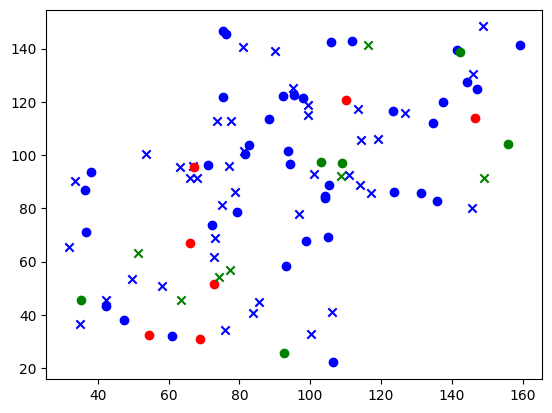

In [13]:
from random import *
import matplotlib.pyplot as plt
classesCount = 2
pointsCount1 = 50
pointsCount2 = 50
n = pointsCount1 + pointsCount2

y = [randint(0, 1) for _ in range(n)]
k = 3

xMin1 = 30
xMax1 = 110
yMin1 = 20
yMax1 = 120
xMin2 = 75
xMax2 = 160
yMin2 = 80
yMax2 = 150

x00 = [uniform(xMin1,xMax1) for i in range(pointsCount1)]
y00 = [uniform(yMin1,yMax1) for i in range(pointsCount1)]
x01 = [uniform(xMin2,xMax2) for i in range(pointsCount2)]
y01 = [uniform(yMin2,yMax2) for i in range(pointsCount2)]


all_x = x00 + x01
all_y = y00 + y01
x = list(zip(all_x, all_y))

p = 0.8

indexes = list(sample(list(range(n)), k=n))


def train_test_split(x, y):
    train_cnt = int(n*p)
    x_train = [x[i] for i in indexes[:train_cnt]]
    y_train = [y[i] for i in indexes[:train_cnt]]
    x_test = [x[i] for i in indexes[train_cnt:]]
    y_test = [y[i] for i in indexes[train_cnt:]]
    return [x_train, y_train, x_test, y_test]


def euclidian_distance(x, y):
    return sum([(x[i] - y[i])**2 for i in range(len(x) - 1)])**0.5


x_train, y_train, x_test, y_test  = train_test_split(x, y)


def knn_fit(x_train, y_train, x_test, n, k):

    y_predict = []

    for point in x_test:
        distances = [0]*n
        for i in range(n):
            distances[i] = [y_train[i], euclidian_distance(point, x_train[i])]
        distances.sort(key=lambda x: x[1])
        group = [0]*(max(y_train)+1)
        for i in range(k):
            group[distances[i][0]] += 1
        indmax = 0
        maxcnt = 0
        for i in range(len(group)):
            if i >= maxcnt:
                maxcnt = group[i]
                indmax = i
        y_predict.append(indmax)

    return y_predict

y_predict = knn_fit(x_train, y_train, x_test, int(p*n), k)
            
def computeAccuracy(y_test,y_predict):
    cnt = 0
    for i in range(len(y_test)):
        if y_test[i] == y_predict[i]:
            cnt += 1
    return cnt/len(y_test)

print('Accuracy:',computeAccuracy(y_test,y_predict))

train_0 = []
train_1 = []
for i in range(len(x_train)):
    if y_train[i] == 0:
        train_0.append(x_train[i])
    if y_train[i] == 1:
        train_1.append(x_train[i])
test_t0 = []
test_f0 = []
test_t1 = []
test_f1 = []
for i in range(len(x_test)):
    if y_test[i] == 0:
        if y_test[i] == y_predict[i]:
            test_t0.append(x_test[i])
        else:
            test_f0.append(x_test[i])
    if y_test[i] == 1:
        if y_test[i] == 1:
            if y_test[i] == y_predict[i]:
                test_t1.append(x_test[i])
            else:
                test_f1.append(x_test[i])

plt.scatter([i[0] for i in train_0], [i[1] for i in train_0], c='b')
plt.scatter([i[0] for i in train_1], [i[1] for i in train_1], marker = 'x', c='b')
plt.scatter([i[0] for i in test_f0], [i[1] for i in test_f0], c = 'r')
plt.scatter([i[0] for i in test_f1], [i[1] for i in test_f1], c='r', marker='x')
plt.scatter([i[0] for i in test_t0], [i[1] for i in test_t0], c='g')
plt.scatter([i[0] for i in test_t1], [i[1] for i in test_t1], marker='x', c='g')
plt.show()